<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/Nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
messages['label']= messages['label'].map({'ham': 0, 'spam': 1})


In [ ]:
messages

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
X = messages.iloc[:,1].values
y = messages.iloc[:,0].values

In [ ]:
X.reshape(-1,1)

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
train_msg, test_msg, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=434)

In [ ]:
train_msg

array(['Lol grr my mom is taking forever with my prescription. Pharmacy is like 2 minutes away. Ugh.',
       'From here after The performance award is calculated every two month.not for current one month period..',
       "It's cool, we can last a little while. Getting more any time soon?",
       ...,
       'UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039.SkilGme.TsCs087147403231Winawk!Age16+£1.50perWKsub',
       "Well keep in mind I've only got enough gas for one more round trip barring a sudden influx of cash",
       'Aiyo a bit pai seh ü noe... Scared he dun rem who i am then die... Hee... But he become better lookin oredi leh...'],
      dtype=object)

In [ ]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [ ]:
word_index = tokenizer.word_index


In [ ]:
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 8027 unique tokens in training data. 


In [ ]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (4457, 50)
Shape of testing tensor:  (1115, 50)


In [ ]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
140/140 - 1s - loss: 0.5142 - accuracy: 0.8578 - val_loss: 0.3306 - val_accuracy: 0.8726
Epoch 2/30
140/140 - 0s - loss: 0.2960 - accuracy: 0.8647 - val_loss: 0.2292 - val_accuracy: 0.8780
Epoch 3/30
140/140 - 0s - loss: 0.1899 - accuracy: 0.9291 - val_loss: 0.1396 - val_accuracy: 0.9552
Epoch 4/30
140/140 - 0s - loss: 0.1219 - accuracy: 0.9637 - val_loss: 0.0927 - val_accuracy: 0.9695
Epoch 5/30
140/140 - 0s - loss: 0.0904 - accuracy: 0.9733 - val_loss: 0.0681 - val_accuracy: 0.9794
Epoch 6/30
140/140 - 0s - loss: 0.0731 - accuracy: 0.9764 - val_loss: 0.0544 - val_accuracy: 0.9821
Epoch 7/30
140/140 - 0s - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.0470 - val_accuracy: 0.9839
Epoch 8/30
140/140 - 0s - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0412 - val_accuracy: 0.9865
Epoch 9/30
140/140 - 0s - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 10/30
140/140 - 0s - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.0350 - val_accuracy: 0.9883

In [ ]:
model.evaluate(testing_padded, test_labels)

35/35 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9901


[0.02801038883626461, 0.9901345372200012]

In [ ]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

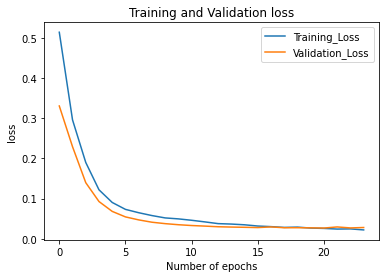

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

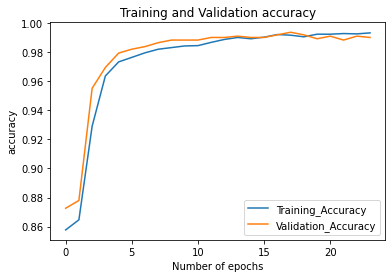

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
# display long string 
pd.options.display.max_colwidth=100
messages[9:12]

,label,message
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...
10,0,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ..."
11,1,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ..."


In [ ]:
predict_msg = [
               
"Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...",
"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried",
"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day",

]

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))


In [ ]:
predict_spam(predict_msg)

array([[0.9639963 ],
       [0.00810209],
       [0.00166291]], dtype=float32)

In [ ]:
predict_msg = ["You are awarded a Nikon Digital Camera. Call now",
               "Call me",
          "What's up?"]
predict_spam(predict_msg)

array([[0.9639963 ],
       [0.00810209],
       [0.00166291]], dtype=float32)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('ClassifierSpamAndHam.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0a92acge/assets


INFO:tensorflow:Assets written to: /tmp/tmp0a92acge/assets


In [ ]:
def makeText(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return padded
data = makeText(predict_msg[0])